# Make a figure of the deformation

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# We need these two classes to set proper ticklabels for Cartopy maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import pyproj
import verde as vd
from vector3d import Vector3D, vector3d_jacobian

In [2]:
region = (-500e3, 500e3, -500e3, 500e3)
spacing = 0.05*100e3
coords = vd.grid_coordinates(region, spacing=spacing)
force = np.array([-1000000, 1000000, 300000])
force_coords = ([0], [0])
jac = vector3d_jacobian(coords, force_coords, poisson=0.5, depth=50e3)
pred = jac.dot(force)
east, north, up = [i.reshape(coords[0].shape) for i in pred.reshape((3, jac.shape[0]//3))]

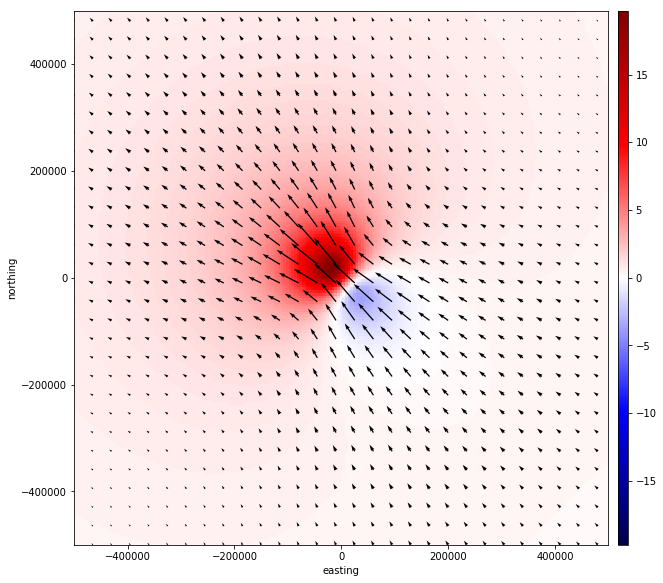

In [3]:
plt.figure(figsize=(10, 8.2))
maxabs = np.abs([up.min(), up.max()]).max()
plt.pcolormesh(coords[0] - spacing/2, coords[1] - spacing/2, up,
              vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(pad=0.01, aspect=50)
s = 7
plt.quiver(coords[0][::s,::s], coords[1][::s,::s], 
           east[::s,::s], north[::s,::s], 
           scale=500)
plt.axis('scaled')
plt.xlabel('easting')
plt.ylabel('northing')
plt.xlim(region[:2])
plt.ylim(region[2:])
plt.tight_layout()
plt.savefig('../../images/example-displacement.png', dpi=300, transparent=True)

In [4]:
jac = vector3d_jacobian(coords, force_coords, poisson=0.5, depth=20e3)
pred = jac.dot(force)
east, north, up = [i.reshape(coords[0].shape) for i in pred.reshape((3, jac.shape[0]//3))]

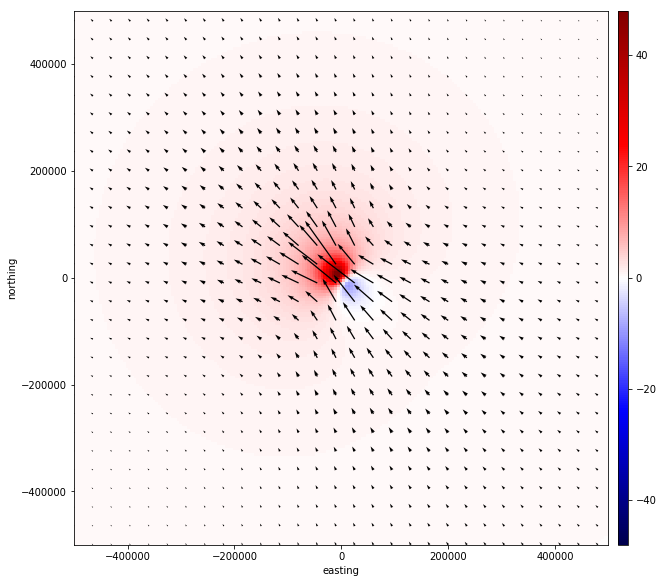

In [5]:
plt.figure(figsize=(10, 8.2))
maxabs = np.abs([up.min(), up.max()]).max()
plt.pcolormesh(coords[0] - spacing/2, coords[1] - spacing/2, up,
              vmin=-maxabs, vmax=maxabs, cmap="seismic")
plt.colorbar(pad=0.01, aspect=50)
s = 7
plt.quiver(coords[0][::s,::s], coords[1][::s,::s], 
           east[::s,::s], north[::s,::s], 
           scale=700)
plt.axis('scaled')
plt.xlabel('easting')
plt.ylabel('northing')
plt.xlim(region[:2])
plt.ylim(region[2:])
plt.tight_layout()
plt.savefig('../../images/example-displacement-shallow.png', dpi=300, transparent=True)